# 9. час: Рад са индексираним табелама

На овом часу ћемо говорити о:
1. индексирању табеле ради флексибилнијег приступа елементима табеле;
2. приступу врстама и појединачним локацијама индексиране табеле; и
3. рачунању са целим редовима и колонама табеле.

## 9.1. Индексирање

Видели смо да је рад са колонама табеле веома једноставан.

Да бисмо могли да радимо са редовима табеле треба прво да нађемо једну колону чија вредност једнозначно одређује цео ред табеле. На пример, у табели са са прошлог часа

| __Име__ | __Пол__ | __Старост__ | __Тежина__ | __Висина__ |
|---|---|---|---|---|
|      Ана | ж | 13 | 46 | 160 |
|    Бојан | м | 14 | 52 | 165 |
|    Влада | м | 13 | 47 | 157 |
|  Гордана | ж | 15 | 54 | 165 |
|    Дејан | м | 15 | 56 | 163 |
|    Ђорђе | м | 13 | 45 | 159 |
|    Елена | ж | 14 | 49 | 161 |
|  Жаклина | ж | 15 | 52 | 164 |
|    Зоран | м | 15 | 57 | 167 |
|    Ивана | ж | 13 | 45 | 158 |
|    Јасна | ж | 14 | 51 | 162 |

колона "Име" је таква колона (колона "Висина" није погодна јер имамо двоје деце са висином 165, па када кажемо "дете са висином 165" није јасно о коме се ради; исто тако ни колоне "Пол", "Старост" и "Тежина" нису погодне).

Таква колона се зове _кључ_ јер је она _кључна_ за приступање редовима табеле. Ако желимо да приступамо елементима табеле по редовима, морамо систему да пријавимо коју колону ћемо користити као кључ. То се постиже позивом функције `set_index` којој проследимо име колоне, а она врати нову табелу "индексирану по датом кључу":

In [1]:
import pandas as pd
podaci = [["Ана",     "ж", 13, 46, 160],
          ["Бојан",   "м", 14, 52, 165],
          ["Влада",   "м", 13, 47, 157],
          ["Гордана", "ж", 15, 54, 165],
          ["Дејан",   "м", 15, 56, 163],
          ["Ђорђе",   "м", 13, 45, 159],
          ["Елена",   "ж", 14, 49, 161],
          ["Жаклина", "ж", 15, 52, 164],
          ["Зоран",   "м", 15, 57, 167],
          ["Ивана",   "ж", 13, 45, 158],
          ["Јасна",   "ж", 14, 51, 162]]
tabela = pd.DataFrame(podaci)
tabela.columns=["Име", "Пол", "Старост", "Тежина", "Висина"]
tabela1=tabela.set_index("Име")

Нова табела (`tabela1`) се од старе (`tabela`) разликује само по томе што редови више нису индексирани бројевима (0, 1, 2, ...) већ именима деце (Ана, Бојан, Влада, ...). Ево старе (неиндексиране табеле) која има колону "Име" и чији редови су индексирани бројевима:

In [2]:
tabela

,Име,Пол,Старост,Тежина,Висина
0,Ана,ж,13,46,160
1,Бојан,м,14,52,165
2,Влада,м,13,47,157
3,Гордана,ж,15,54,165
4,Дејан,м,15,56,163
5,Ђорђе,м,13,45,159
6,Елена,ж,14,49,161
7,Жаклина,ж,15,52,164
8,Зоран,м,15,57,167
9,Ивана,ж,13,45,158


А ево и нове табеле у којој су редови индексирани именима деце:

In [3]:
tabela1

,Пол,Старост,Тежина,Висина
Име,,,,
Ана,ж,13,46,160
Бојан,м,14,52,165
Влада,м,13,47,157
Гордана,ж,15,54,165
Дејан,м,15,56,163
Ђорђе,м,13,45,159
Елена,ж,14,49,161
Жаклина,ж,15,52,164
Зоран,м,15,57,167


Колона "Име" је и даље присутна у табели `tabela1`, али има посебан статус. Ако покушамо да јој приступимо као "обичној" колони добићемо грешку:

In [4]:
tabela1["Име"]

KeyError: 'Име'

Међутим, она је ту као _индексна колона_:

In [5]:
tabela1.index

Index(['Ана', 'Бојан', 'Влада', 'Гордана', 'Дејан', 'Ђорђе', 'Елена',
       'Жаклина', 'Зоран', 'Ивана', 'Јасна'],
      dtype='object', name='Име')

Ако желимо да прикажемо висину деце у групи графиконом тако да имена деце буду на хоризонталној оси, то сада можемо урадити овако:

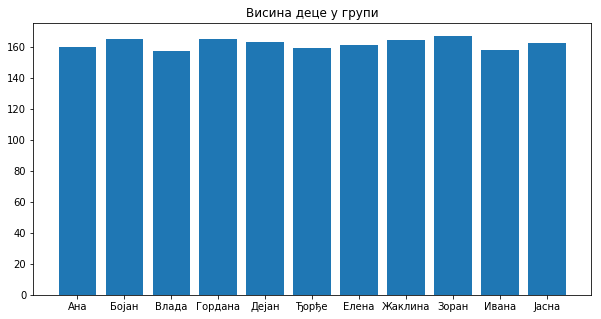

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(tabela1.index, tabela1["Висина"])
plt.title("Висина деце у групи")
plt.show()
plt.close()

Ознаке на хоризонталној оси узимамо из индексне колоне `tabela1.index`, док податке о висини стубића узимамо из колоне `tabela1["Висина"]`.

## 9.2. Приступ врстама и појединачним ћелијама индексиране табеле

Структура података _DataFrame_ је оптимизована за рад са колонама табеле. Срећом, када имамо индексирану табелу као што је то `tabela1`, користећи функцију `loc` (од енгл. _location_ што значи "локација, положај, место") можемо да приступамо редовима табеле, као и појединачним ћелијама табеле.

Податке о појединачним редовима табеле можемо да видимо овако:

In [8]:
tabela1.loc["Дејан"]

Пол          м
Старост     15
Тежина      56
Висина     163
Name: Дејан, dtype: object

Као аргумент функције `loc` можемо да наведемо и распон, и тако ћемо добити одговарајући део табеле:

In [9]:
tabela1.loc["Дејан":"Зоран"]

,Пол,Старост,Тежина,Висина
Име,,,,
Дејан,м,15,56,163
Ђорђе,м,13,45,159
Елена,ж,14,49,161
Жаклина,ж,15,52,164
Зоран,м,15,57,167


Ако као други аргумент функције `loc` наведемо име колоне, рецимо овако:

    tabela1.loc["Дејан", "Висина"]

добићемо информацију о Дејановој висини.

In [10]:
tabela1.loc["Дејан", "Висина"]

163

Ево како можемо да добијемо информацију о тежини и висини неколико деце:

In [11]:
tabela1.loc["Дејан":"Зоран", "Тежина":"Висина"]

,Тежина,Висина
Име,,
Дејан,56,163
Ђорђе,45,159
Елена,49,161
Жаклина,52,164
Зоран,57,167


## 9.3. Рачун по врстама и колонама табеле

Кренимо од једног примера. У ћелији испод дате су оцене неких ученика из српског, енглеског, математике, физике, хемије и ликовног:

In [12]:
# изврши ову ћелију
razred = [["Ана",     5, 3, 5, 2, 4, 5],
          ["Бојан",   5, 5, 5, 5, 5, 5],
          ["Влада",   4, 5, 3, 4, 5, 4],
          ["Гордана", 5, 5, 5, 5, 5, 5],
          ["Дејан",   3, 4, 2, 3, 3, 4],
          ["Ђорђе",   4, 5, 3, 4, 5, 4],
          ["Елена",   3, 3, 3, 4, 2, 3],
          ["Жаклина", 5, 5, 4, 5, 4, 5],
          ["Зоран",   4, 5, 4, 4, 3, 5],
          ["Ивана",   2, 2, 2, 2, 2, 5],
          ["Јасна",   3, 4, 5, 4, 5, 5]]

Сада ћемо од ових података направити табелу чије колоне ће се звати "Име", "Српски", "Енглески", "Математика", "Физика", "Хемија", "Ликовно" и која ће бити индексирана по колони "Име":

In [13]:
ocene = pd.DataFrame(razred)
ocene.columns=["Име", "Српски", "Енглески", "Математика", "Физика", "Хемија", "Ликовно"]
ocene1 = ocene.set_index("Име")
ocene1

,Српски,Енглески,Математика,Физика,Хемија,Ликовно
Име,,,,,,
Ана,5,3,5,2,4,5
Бојан,5,5,5,5,5,5
Влада,4,5,3,4,5,4
Гордана,5,5,5,5,5,5
Дејан,3,4,2,3,3,4
Ђорђе,4,5,3,4,5,4
Елена,3,3,3,4,2,3
Жаклина,5,5,4,5,4,5
Зоран,4,5,4,4,3,5


Ако желимо да израчунамо просек по предметима, треба на сваку колону ове табеле да применимо функцију `mean`. Листа са именима свих колона табеле `ocene1` се добија као `ocene1.columns`, па сада само треба да прођемо кроз ову листу и за сваку колону да израчунамо просек:

In [14]:
for predmet in ocene1.columns:
    print(predmet, "->", ocene1[predmet].mean())

Српски -> 3.909090909090909
Енглески -> 4.181818181818182
Математика -> 3.727272727272727
Физика -> 3.8181818181818183
Хемија -> 3.909090909090909
Ликовно -> 4.545454545454546


Да бисмо израчунали просечне оцене сваког ученика функцију `mean` ћемо применити на врсте табеле које добијамо позивом функције `loc`. Погледајмо, прво, како то можемо да урадимо за једног ученика:

In [15]:
print("Ђорђе има следеће оцене:")
print(ocene1.loc["Ђорђе"])
print("Просек његових оцена је:", ocene1.loc["Ђорђе"].mean())

Ђорђе има следеће оцене:
Српски        4
Енглески      5
Математика    3
Физика        4
Хемија        5
Ликовно       4
Name: Ђорђе, dtype: int64
Просек његових оцена је: 4.166666666666667


Списак свих ученика се налази у индексној колони, па просеке по свим ученицима можемо да израчунамо овако:

In [16]:
for ucenik in ocene1.index:
    print(ucenik, "->", ocene1.loc[ucenik].mean())

Ана -> 4.0
Бојан -> 5.0
Влада -> 4.166666666666667
Гордана -> 5.0
Дејан -> 3.1666666666666665
Ђорђе -> 4.166666666666667
Елена -> 3.0
Жаклина -> 4.666666666666667
Зоран -> 4.166666666666667
Ивана -> 2.5
Јасна -> 4.333333333333333


## 9.4. Задаци

Задатке реши у Џупајтеру.

**Задатак 1.** Ученици осмог разреда једне школе су анкетирани о томе коју врсту филмова најрадије гледају. Подаци анкете су дати у следећој табели (у коју нису унети неважећи и бесмислени одговори):

| Жанр | 8-1 | 8-2 | 8-3 | 8-4 | 8-5 |
|------|-----|-----|-----|-----|-----|
| Комедија | 4 | 3 | 5 | 2 | 3 |
| Хорор | 1 | 0 | 2 | 1 | 6 |
| Научна фантастика | 10 | 7 | 9 | 8 | 9 |
| Авантуре | 4 | 3 | 4 | 2 | 2 |
| Историјски | 1 | 0 | 2 | 0 | 0 |
| Романтични | 11 | 10 | 7 | 9 | 8 |

_(а)_ Формирај одговарајућу табелу позивом функције _DataFrame_. Индексирај табелу колоном "Жанр".

_(б)_ Израчунај и испиши колико гласова је добио сваки од наведених жанрова.

_(в)_ За свако одељење израчунај и испиши колико је било валидних гласова.

_(г)_ Колико је укупно ученика осмих разреда учествовало у анкетирању? (Рачунамо само ученике који су дали валидне одговоре на анкету.)

**Задатак 2.** Нутритивни подаци за неке намирнице су дати у следећој табели:

| Намирница (100г) | Енергетска вредност (kcal) | Угљени хидрати (г) | Беланчевине (г) | Масти (г) |
|--|--|--|--|--|
| Црни хлеб | 250 | 48,2 | 8,4 | 1,0 |
| Бели хлеб | 280 | 57,5 | 6,8 | 0,5 |
| Кисела павлака (10% м.м.) | 127 | 4,0 | 3,1 | 10,5 |
| Маргарин | 532 | 4,6 | 3,2 | 1,5 |
| Јогурт | 48 | 4,7 | 4,0 | 3,3 |
| Млеко (2,8% м.м.) | 57 | 4,7 | 3,3 | 2,8 |
| Салама паризер | 523 | 1,0 | 17,0 | 47,0 |
| Пршута | 268 | 0,0 | 25,5 | 18,4 |
| Пилећа прса | 110 | 0,0 | 23,1 | 1,2 |

У ћелији испод ови подаци су припремљени у облику индексиране _DataFrame_ структуре (са скраћеним именима):

In [ ]:
namirnice = pd.DataFrame([
    ["Цхлеб", 250, 48.2, 8.4, 1.0],
    ["Бхлеб", 280, 57.5, 6.8, 0.5],
    ["Павлака", 127, 4.0, 3.1, 10.5],
    ["Маргарин", 532, 4.6, 3.2, 1.5],
    ["Јогурт", 48, 4.7, 4.0, 3.3],
    ["Млеко", 57, 4.7, 3.3, 2.8],
    ["Паризер", 523, 1.0, 17.0, 47.0],
    ["Пршута", 268, 0.0, 25.5, 18.4],
    ["ПилПрса", 110, 0.0, 23.1, 1.2]])
namirnice.columns=["Намирница", "ЕнергВр", "УХ", "Бел", "Масти"]
namirnice1 = namirnice.set_index("Намирница")

_(а)_ Милош је за доручак појео два парчета белог хлеба и попио шољу млека. Свако парче хлеба је било намазано павлаком и имало је један шнит пршуте. Колика је енергетска вредност Милошевог доручка (у kcal), ако претпоставимо да једно парче хлеба има 100 г, да је за мазање једног парчета хлеба довољно 10 г премаза, да један шнит пршуте има 20г и да шоља млека има 2 дл (што је приближно 200 г)?

_(б)_ Колико грама масти је било у Милошевом доручку?

_(в)_ Прикажи линијским дијаграмом количину угљених хидрата у намирницама наведеним у табели.